In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
plt.style.use('seaborn')
warnings.filterwarnings('ignore')
COLOR = 'white'

#배경을 어두운것을 쓰기 때문에 char, label 색상 변경
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

df = pd.read_csv('pima-indians-diabetes.csv',

                  names = ['pregnant', 'plasma', 'pressure', 'thickness',
                  'insulin', 'BMI', 'pedigree', 'age', 'class'])
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.isnull().sum()

pregnant     0
plasma       0
pressure     0
thickness    0
insulin      0
BMI          0
pedigree     0
age          0
class        0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.dtypes

pregnant       int64
plasma         int64
pressure       int64
thickness      int64
insulin        int64
BMI          float64
pedigree     float64
age            int64
class          int64
dtype: object

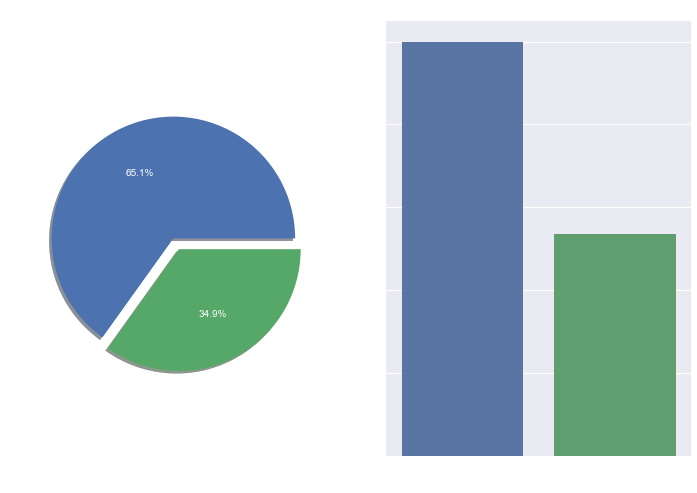

In [5]:
f, ax = plt.subplots(1,2, figsize=(12,8))
df['class'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pima-Indian Diabete')
sns.countplot('class', data=df, ax=ax[1])
ax[1].set_title('Pima-Indian Diabete')
plt.show()

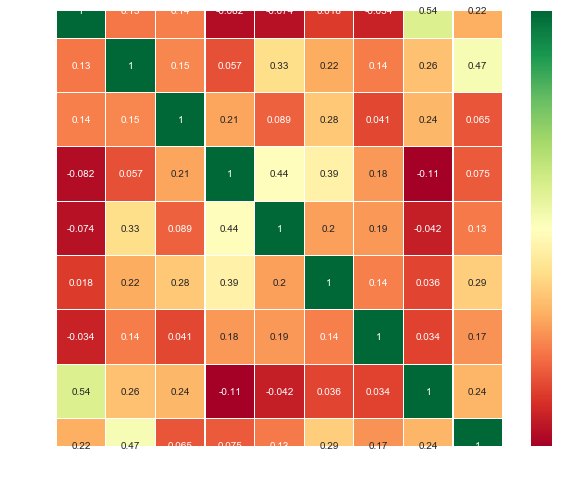

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import svm
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition


In [8]:
X=df[df.columns[:8]]
Y=df['class']

In [9]:
# Standardization
x_std = StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components=8)
sklearn_pca_x = pca.fit_transform(x_std)

sklearn_result = pd.DataFrame(sklearn_pca_x, columns = ['pregnant', 'plasma', 'pressure', 'thickness',
                  'insulin', 'BMI', 'pedigree', 'age'])
sklearn_result

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age
0,1.068503,1.234895,0.095930,0.496990,-0.109985,0.357183,0.858821,0.974304
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507,-0.406329,0.757034,0.354215
2,-0.396477,1.595876,1.760678,-0.070395,0.906474,-0.040018,-1.152990,1.068528
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060,-0.412520,-0.029247,-0.130648
4,2.359334,-2.184819,2.963107,4.033099,0.592684,1.078341,0.549358,-0.319352
...,...,...,...,...,...,...,...,...
763,1.562085,1.923150,-0.867408,-0.390926,-2.541527,-0.077322,1.141357,-0.138590
764,-0.100405,-0.614181,-0.764353,-0.134859,0.499290,0.529339,0.152109,0.467532
765,-0.283475,0.097065,-0.077192,-0.687561,-0.523009,-0.538270,-0.335563,0.289439
766,-1.060324,0.837062,0.425030,-0.204493,0.957593,0.153307,1.180308,-0.534344


In [10]:
mMscaled_data=sklearn_result
mMscaled_data = pd.DataFrame(mMscaled_data)
mMscaled_data

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age
0,1.068503,1.234895,0.095930,0.496990,-0.109985,0.357183,0.858821,0.974304
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507,-0.406329,0.757034,0.354215
2,-0.396477,1.595876,1.760678,-0.070395,0.906474,-0.040018,-1.152990,1.068528
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060,-0.412520,-0.029247,-0.130648
4,2.359334,-2.184819,2.963107,4.033099,0.592684,1.078341,0.549358,-0.319352
...,...,...,...,...,...,...,...,...
763,1.562085,1.923150,-0.867408,-0.390926,-2.541527,-0.077322,1.141357,-0.138590
764,-0.100405,-0.614181,-0.764353,-0.134859,0.499290,0.529339,0.152109,0.467532
765,-0.283475,0.097065,-0.077192,-0.687561,-0.523009,-0.538270,-0.335563,0.289439
766,-1.060324,0.837062,0.425030,-0.204493,0.957593,0.153307,1.180308,-0.534344


In [11]:
mMscaled_data = pd.merge(mMscaled_data, df['class'], left_index=True, right_index=True)
mMscaled_data

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,1.068503,1.234895,0.095930,0.496990,-0.109985,0.357183,0.858821,0.974304,1
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507,-0.406329,0.757034,0.354215,0
2,-0.396477,1.595876,1.760678,-0.070395,0.906474,-0.040018,-1.152990,1.068528,1
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060,-0.412520,-0.029247,-0.130648,0
4,2.359334,-2.184819,2.963107,4.033099,0.592684,1.078341,0.549358,-0.319352,1
...,...,...,...,...,...,...,...,...,...
763,1.562085,1.923150,-0.867408,-0.390926,-2.541527,-0.077322,1.141357,-0.138590,0
764,-0.100405,-0.614181,-0.764353,-0.134859,0.499290,0.529339,0.152109,0.467532,0
765,-0.283475,0.097065,-0.077192,-0.687561,-0.523009,-0.538270,-0.335563,0.289439,0
766,-1.060324,0.837062,0.425030,-0.204493,0.957593,0.153307,1.180308,-0.534344,1


In [12]:
# Feature Selection

from sklearn.linear_model import Lasso

# X=mMscaled_data[mMscaled_data.columns[:8]]
regression = Lasso()
regression.fit(X, Y)

regression.coef_
# 데이터셋 자체가 좋지 않은것 같다....

array([ 0.        ,  0.00598071,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ])

In [13]:
train,test=train_test_split(mMscaled_data, test_size=0.3,random_state=0,stratify=mMscaled_data['class'])
train_X=train[train.columns[:8]]
train_Y=train[train.columns[8:]]
test_X=test[test.columns[:8]]
test_Y=test[test.columns[8:]]

In [14]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.683982683982684


In [15]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the Naivebayes is ', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the Naivebayes is  0.7489177489177489


In [16]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy fo the KNN is ', metrics.accuracy_score(prediction5, test_Y))

The accuracy fo the KNN is  0.7445887445887446


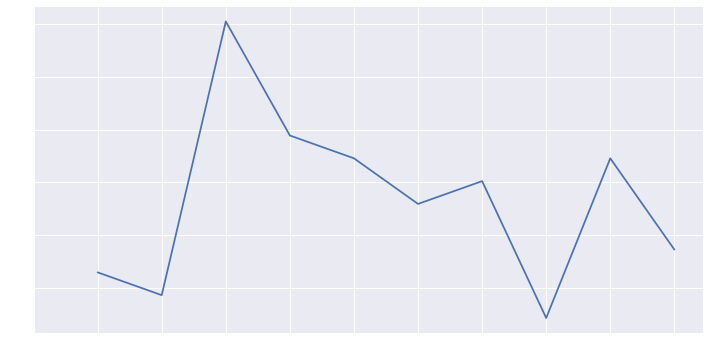

Accuracies for different calues of n are:  [0.72294372 0.71861472 0.77056277 0.74891775 0.74458874 0.73593074
 0.74025974 0.71428571 0.74458874 0.72727273] with the max avlues as  0.7705627705627706


In [17]:
a_index = list(range(1,11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different calues of n are: ', a.values, 'with the max avlues as ', a.values.max())

# print('The cross validated score for XGBoost is:',result.mean())
# result=cross_val_score(NGBoost,X,Y,cv=10,scoring='accuracy')
# print('The cross validated score for NGBoost is:',result)
# Y_preds = ngb.predict(test_X)
# Y_dists = ngb.pred_dist(test_X)

# test_MSE = mean_squared_error(Y_preds, Y_test)
# print('Test MSE', test_MSE)

# test Negative Log Likelihood
# test_NLL = -Y_dists.logpdf(Y_test.flatten()).mean()
# print('Test NLL', test_NLL)

In [18]:

model=svm.SVC(kernel='linear',C=1,gamma=0.1)
model.fit(train_X, train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.7705627705627706


In [19]:
model = svm.SVC(kernel='rbf', C=0.1, gamma= 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.7705627705627706


In [20]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regreesion is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regreesion is 0.7748917748917749


In [21]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.670995670995671


In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits = 10, random_state =22)
xyz=[]
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Foerst' ]

models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for model in models:
    
    cv_result = cross_val_score(model, X, Y, cv = kfold,scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std': std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.772129,0.046952
Radial Svm,0.651025,0.072141
Logistic Regression,0.769515,0.048411
KNN,0.739610,0.051810
Decision Tree,0.691302,0.064716
Naive Bayes,0.755178,0.042766
Random Foerst,0.778623,0.054276


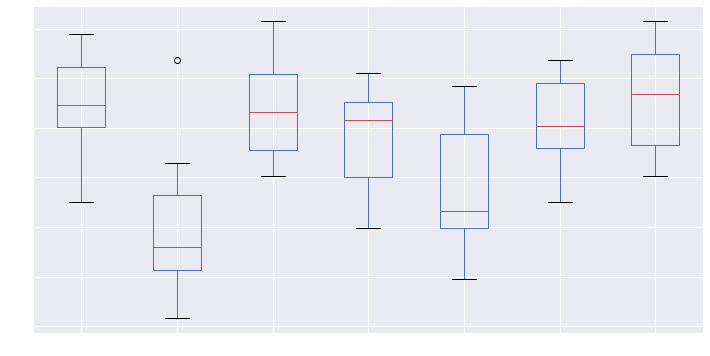

In [23]:
plt.subplots(figsize = (12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

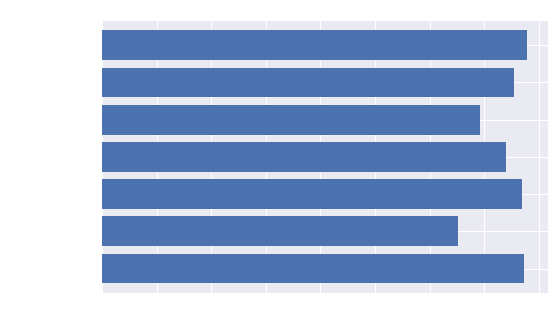

In [24]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper={'kernel':kernel, 'C':C, 'gamma': gamma}
gd=GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  5.4min finished


0.76171875
SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [26]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0, n_estimators= 100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))
result=cross_val_score(model, X, Y, cv=10, scoring= 'accuracy')
print('The cross validated score for bagged Decision Tree is: ',result.mean())

The accuracy for bagged Decision Tree is: 0.7792207792207793
The cross validated score for bagged Decision Tree is:  0.753896103896104


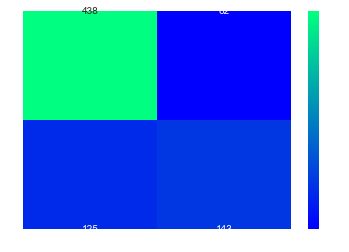

In [27]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot= True, fmt ='2.0f')
plt.show()

In [28]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators': n_estimators, 'learning_rate': learn_rate}
gd= GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  4.0min finished


0.7799479166666666
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=600, random_state=None)


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators = 500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring= 'accuracy')
print('The cross validated score for Gradient Boosting is: ', result.mean())

The cross validated score for Gradient Boosting is:  0.7421907040328093


In [30]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf= VotingClassifier(estimators = [('KNN', KNeighborsClassifier(n_neighbors=10)),('RBF',svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),('RFor',RandomForestClassifier(n_estimators=500, random_state = 0)),('LR',LogisticRegression(C=0.05)),('DT', DecisionTreeClassifier(random_state=0)), ('NB', GaussianNB()),('svm',svm.SVC(kernel= 'linear', probability = True))],voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is: ', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf,X,Y, cv= 10, scoring= "accuracy")
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is:  0.7792207792207793
The cross validated score is 0.76296992481203


In [31]:
import xgboost as xg

xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())


The cross validated score for XGBoost is: 0.7422248803827751


In [33]:
#Deeplearning Model

from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import tensorflow as tf
from keras.callbacks import EarlyStopping

# 모델의 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss',
patience=100)

# 모델 실행
model.fit(train_X, train_Y, validation_split=0.2, epochs=200, batch_size=20, callbacks=[early_stopping_callback])

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(test_X, test_Y)[1]))



Train on 429 samples, validate on 108 samples
Epoch 1/200
429/429 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.6177 - val_loss: 0.6429 - val_accuracy: 0.7315
Epoch 2/200
429/429 [==============================] - 0s 165us/step - loss: 0.6426 - accuracy: 0.7016 - val_loss: 0.6284 - val_accuracy: 0.6759
Epoch 3/200
429/429 [==============================] - 0s 160us/step - loss: 0.6143 - accuracy: 0.7389 - val_loss: 0.6019 - val_accuracy: 0.7037
Epoch 4/200
429/429 [==============================] - 0s 158us/step - loss: 0.5731 - accuracy: 0.7459 - val_loss: 0.5683 - val_accuracy: 0.6759
Epoch 5/200
429/429 [==============================] - 0s 156us/step - loss: 0.5385 - accuracy: 0.7599 - val_loss: 0.5529 - val_accuracy: 0.6667
Epoch 6/200
429/429 [==============================] - 0s 165us/step - loss: 0.5124 - accuracy: 0.7762 - val_loss: 0.5528 - val_accuracy: 0.6667
Epoch 7/200
429/429 [==============================] - 0s 167us/step - loss: 0.4965 -

429/429 [==============================] - 0s 151us/step - loss: 0.4028 - accuracy: 0.8205 - val_loss: 0.6510 - val_accuracy: 0.6944
Epoch 56/200
429/429 [==============================] - 0s 149us/step - loss: 0.4015 - accuracy: 0.8205 - val_loss: 0.6490 - val_accuracy: 0.6944
Epoch 57/200
429/429 [==============================] - 0s 156us/step - loss: 0.3996 - accuracy: 0.8182 - val_loss: 0.6493 - val_accuracy: 0.6944
Epoch 58/200
429/429 [==============================] - 0s 153us/step - loss: 0.3985 - accuracy: 0.8182 - val_loss: 0.6492 - val_accuracy: 0.6944
Epoch 59/200
429/429 [==============================] - 0s 153us/step - loss: 0.3981 - accuracy: 0.8228 - val_loss: 0.6425 - val_accuracy: 0.7037
Epoch 60/200
429/429 [==============================] - 0s 156us/step - loss: 0.3968 - accuracy: 0.8182 - val_loss: 0.6540 - val_accuracy: 0.6944
Epoch 61/200
429/429 [==============================] - 0s 156us/step - loss: 0.3953 - accuracy: 0.8159 - val_loss: 0.6502 - val_accuracy

# 왜 NGBoost가 안되는지 모르겠음...

## 기존 노트북에선 작동하나 새로운 컴퓨터에선 Nonetype error발생함 - 아래코드..

from ngboost.ngboost import NGBoost
from ngboost.learners import default_tree_learner
from ngboost.distns import Normal
from ngboost.scores import MLE
from ngboost import NGBClassifier


ngb = NGBClassifier(n_estimators=500, learning_rate=0.01)
result = cross_val_score(ngb,X,Y, cv=3,scoring='accuracy')
print(result.mean())
ngb = NGBClassifier().fit(train_X, train_Y)
